<a href="https://colab.research.google.com/github/rosh4github/eportfolio/blob/main/Unit09_Ex1_Convolutional_Neural_Networks_(CNN)_Object_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source:

Unit 9 - Machine Learning module - University of Essex Online (2024)

Gemini (2024) Gemini response to Roshni Kasturi. 3 November.

![Screenshot%202021-02-04%20at%2010.30.29%20am.png](attachment:Screenshot%202021-02-04%20at%2010.30.29%20am.png)

# Convolutional Neural Networks (CNN) - Object Recognition

# Imports

In [ ]:
from numpy.random import seed
seed(888) # calls the imported seed function with the value 888 (sets the seed for numpy's random no. generator, i.e. reproducible/repeatable as numpy will generate same sequence of random #s every time the code is run)

# below = commented out, was likely an attempt to set the random seed for tensorflow
#from tensorflow import set_random_seed
#set_random_seed(4112)

# An open-source library for ML
import tensorflow
tensorflow.random.set_seed(112) # sets random seed for tensorflow's random # generator to 112 # reproducibility

In [ ]:
# Importing libraries/modules for bulding, training,  and evaluating a Convolutional Neural Network (CNN) for object recognition

# Essential libraries

import os # "This line imports the os module, which provides functions for interacting with the operating system, like managing files and directories." (Gemini, 2024)
import numpy as np # "Imports the numpy library and assigns it the alias np. NumPy is fundamental for numerical computations in Python, providing powerful array objects and mathematical functions." (Gemini, 2024)
import itertools # "Imports the itertools module, which provides functions for working with iterators and creating efficient loops." (Gemini, 2024)

# Deep Learning Tools

import tensorflow as tf # "Imports the tensorflow library and assigns it the alias tf. TensorFlow is a popular deep learning framework used for building and training neural networks." (Gemini, 2024)
import keras # "Imports the keras library, a high-level API for building and training neural networks. Keras often runs on top of TensorFlow." (Gemini, 2024)
from keras.datasets import cifar10 # "Imports the cifar10 dataset specifically from Keras' datasets. CIFAR-10 is a common dataset used for image recognition tasks, containing images of 10 different classes (e.g., airplanes, cars, birds)." (Gemini, 2024)

# Importing Layers for the CNN

from keras.models import Sequential # to define model/ layers # "Imports the Sequential model from Keras, which allows you to create neural networks by stacking layers sequentially." (Gemini, 2024)
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten # "Imports specific layer types from Keras for building the CNN:" (Gemini, 2024)
# Dense: "Represents a fully connected layer in the network.
# Conv2D: "Represents a 2-dimensional convolutional layer, essential for feature extraction in images." (Gemini, 2024)
# MaxPool2D: "Represents a 2-dimensional max pooling layer, used to reduce the spatial dimensions of the feature maps." (Gemini, 2024)
# Flatten: "Converts the multi-dimensional feature maps into a single vector, preparing them for the fully connected layers." (Gemini, 2024)

# Importing Evaluation Tools

from sklearn.metrics import confusion_matrix # "Imports the confusion_matrix function from scikit-learn (sklearn), used to evaluate the performance of a classification model." (Gemini, 2024)

# Importing tools for image display

from IPython.display import display # "Imports the display function, which is helpful for displaying images and other objects within a Jupyter notebook." (Gemini, 2024)
from keras.preprocessing.image import array_to_img # "Imports the array_to_img function, allowing you to convert image data stored as NumPy arrays into image objects." (Gemini, 2024)

# Importing utility functions

from tensorflow.keras.utils import to_categorical # "Imports the to_categorical function, used to convert class labels into a one-hot encoded format suitable for training a neural network." (Gemini, 2024)

# Importing Visualization tools

import matplotlib.pyplot as plt # "Imports the matplotlib.pyplot module and assigns it the alias plt. Matplotlib is a widely used library for creating visualizations in Python." (Gemini, 2024)

# "This is a "magic command" specific to Jupyter notebooks. It ensures that plots generated by Matplotlib are displayed directly within the notebook" (Gemini, 2024)
%matplotlib inline

In [ ]:
# pandas - for working with and analyzing data
# organizing data in tables/df; cleaning & preparing data for analysis; performing calculations and analysis on data
import pandas as pd

We are using Tensorflow (one of its most popular backends) to power Keras (high-level API)

- backend: underlying computational engine to perform mathematical ops in training/running a neural network (engine to a car)
- TensorFlow as a backend - provides computational efficiency, flexibility, scalability, large community/support

# Get the Dataset

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 color images containing one of 10 object classes, with 6000 images per class. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.
The dataset is popularly used to train image classification models

![Screenshot%202021-02-05%20at%2012.47.25%20pm.png](attachment:Screenshot%202021-02-05%20at%2012.47.25%20pm.png)

In [ ]:
# Getting the dataset as a Tuple

# cifar10.load_data = function from keras.datasets module specifically designed to load the dataset; when called - dataset is downloaded and loaded into memory
# data returned from call in a specific structure: a tuple of tuples
# each inner tuple contains: 1. image data; 2. corresponding labels
# below is Python's tuple unpacking feature

# x_train_all - img data for training. NumPy array where each element represents an image
# y_train_all - stores the labels for the training images. NumPy array
# x_test - img data for testing
# y_test - stores the labels for the testing images
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Constants

In [ ]:
# 10 different classes of objects in CIFAR-10 dataset:
LABEL_NAMES = ['airplane', 'automobile','bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] # list in Python - multiple items stored in a specific order as 'elements' of the list

# Exploring the Data

Lets look at the first image in the dataset

In [ ]:
x_train_all.shape # .shape (attribute of NumPy array) results in a tuple (kind of list) w/3 outputs: 1. # of images in dataset, 2. height of each image in pixels, 3. width of each image in pixels; and sometimes - # of color channels

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
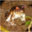

In [ ]:
x_train_all[0] # first image in dataset

In [ ]:
x_train_all[0].shape
# "When you access .shape on an array, it gives you a tuple representing the dimensions of that array.
# In the case of an image, it would typically tell you the height, width, and the number of color channels (e.g., 3 for RGB images)." (Gemini, 2024)

(32, 32, 3)

#### Using ipython to display the image

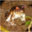

In [ ]:
# To use the ipython display to view an image

# array_to_img function from keras.preprocessing.image module - converts NumPy array representing image data into a PIL (Python Imaging Library) image object for display
pic = array_to_img(x_train_all[0])

# display() - function from the IPython.display module - to display objects like images directly within Jupyter
display(pic)

#### Using Matplotlib to view the image

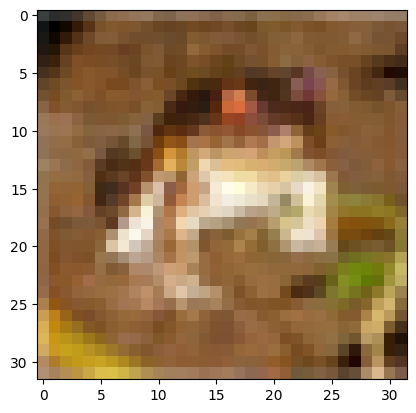

In [ ]:
# function designed to display data as an image
plt.imshow(x_train_all[0])


In [ ]:
# To check the label
y_train_all.shape # simple 1D array

(50000, 1)

In [ ]:
# Note that in the image above the index 1 corresponds to "Automobile"
# we have a 2 dimension numpy array; that is why we also include " [0] "

# "[0] selects the first image's label from the training dataset.
# [0] is used again because the labels are stored in a 2-dimensional array, and we want the first element within that label." (Gemini, 2024)

y_train_all[0][0]

6

In [ ]:
# Using the lable names to get the actual names of classes

# y_train_all[0][0] gives out a numerical label, which serves as an index for LABEL_NAMES to fetch the name of the object class associated with that numerical label

LABEL_NAMES[y_train_all[0][0]]

'frog'

### The shape of the image
    * 32, 32 is the weight and the height
    * 3 is the number of channels (These are the number of colors): Red, Green & Blue (RGB)
    
 * x_train_all.shape  >>> (50000, 32, 32, 3)
     * this means we have 50,000 entries | then 32x32  weight and height| 3 colors (RGB)

In [ ]:
x_train_all.shape

(50000, 32, 32, 3)

In [ ]:
number_of_images, x, y, c = x_train_all.shape
print(f'Number of images = {number_of_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

Number of images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [ ]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

#### * We need to preprocess our data so that it is easier to feed it to our neural network.


### Scaling / normalizing both x_train and test


In [ ]:
x_train_all = x_train_all / 255.0 # divides each pixel value by 255, result assigned back to the same variable

In [ ]:
x_test =  x_test / 255.0 # Why 255? In typical images, pixel values range from 0 to 255 (0 - black; 255 - white; values in between are shades of gray or colors)

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

### Creating categorical encoding for the "y " data

In [ ]:
# 10 >>> simply means we have 10 classes like we already know (creating the encoding for 10 classes)
# one-hot encoding - a way to represent categorical data (e.g. image labels) as numerical vectors
# Neural networks work best w numerical data, but, our labels herein are integers (0, 1, 2..) which can be interpreted to have an ordinal relationship by the network
# ^encoding solves this - now each label converts into a one-hot encoded representation (i.e. binary vector of length 10 classes)
# "If an image belongs to class 'airplane' (label 0), its one-hot encoded representation would be [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]" (Gemini, 2024)

# to_categorical >> function from Keras that performs one-hot encoding; takes original array dataset & # of classes in dataset
y_cat_train_all = to_categorical(y_train_all,10)

In [ ]:
# 10 >>> simply means we have 10 classes like we already know (creating the encoding for 10 classes)
y_cat_test = to_categorical(y_test,10)

In [ ]:
y_cat_train_all

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# Creating the Validation dataset
![Screenshot%202021-02-05%20at%206.37.47%20pm.png](attachment:Screenshot%202021-02-05%20at%206.37.47%20pm.png)

For small data we usually go with:
    * 60% for Training
    * 20% Validation
    * 20% Testing
    
Only the final selected model gets to see the testing data. This helps us to ensure that we have close to real data in real-world when the model is deployed. Only our best model gets to see our testing dataset. Because it will give us a realistic impression of how our model will do in the real world
___

However, if the dataset is enormous.:
    * 1% for is used for validation
    * 1% for is used for testing

In [ ]:
VALIDATION_SIZE = 10000 # i.e. 20% for validation --- dataset is seen as small data

In [ ]:
# VALIDATION_SIZE = 10,000 as defined above

# x_val - will store all validation set image data
# slicing - takes (from the beginning up to but not including) 10000 images and assigns to x_val for validation set
x_val = x_train_all[:VALIDATION_SIZE]

# y_val_cat - will store one-hot encoded labels (categorical labels) for the validation set
# first 10,000 labels
y_val_cat = y_cat_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 32, 32, 3)

In [ ]:
y_val_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<b>NEXT:</b>
* We Create two NumPy arrays x_train and y_train that have the shape(40000, 3072) and (40000,1) respectively.
* They will contain the last 40000 values from x_train_all and y_train_all respectively

In [ ]:
x_train = x_train_all[VALIDATION_SIZE:] #10,000 to end
y_cat_train= y_cat_train_all[VALIDATION_SIZE:]

In [ ]:
x_train.shape

(40000, 32, 32, 3)

In [ ]:
y_cat_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

 ![Screenshot%202021-02-15%20at%208.04.47%20pm.png](attachment:Screenshot%202021-02-15%20at%208.04.47%20pm.png)
 ## NOTE:
 <h4>* <em>FILTERS: </em>
    Typical values for the number of filters can be determined by the data set's complexity. So essentially the larger the images, the more variety and the more classes you're trying to classify then the more filters you should have.</h4>
   <h4> * Most times people typically pick filter based on powers of 2, for example, 32. However, if you have more complex data like road signs etc. you should be starting with a higher filter value</h4>
   <h4>The default STRIDE value is 1 x 1 pixel</h4>

# BUILDING THE MODEL

In [ ]:
# Defines and configures the CNN model

## ************* MODEL INITIALIZATION *************************

# initializes a Sequential model (i.e. a linear stack of layers, like building a tower) in Keras
model = Sequential()

## ************* FIRST SET OF LAYERS *************************

# CONVOLUTIONAL LAYER (Conv2D)

# model.add - to add a layer to the sequential model
# Conv2D(...) - adds a 2D convolutional layer;
# - filters/kernels to learn - that detect specific patters in image
# - kernel_size - size of the filter (4x4 pixels herein)
# - input_shape - only needed for the first layer; tells the model the shape of input images (32x32 px w/3 color channels (RGB))
# - activation - applies the Rectified Linear Unit (ReLU) activation function to the output of the convolutional layer; ReLU introduces non-linearity - crucial for CNNs to learn complex patterns
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER

# MaxPool2D - max pooling layer - max pooling reduces spatial dimensions of feature maps (i.e. output of the convolutional layer) - this helps reduce computation + make model more robust to small variations in the input
# pool_size - specifies size of pooling window (2x2 px herein)
model.add(MaxPool2D(pool_size=(2, 2)))

## *************** SECOND SET OF LAYERS ***********************

#Since the shape of the data is 32 x 32 x 3 =3072 ...
#We need to deal with this more complex structure by adding yet another convolutional layer

# *************CONVOLUTIONAL LAYER

# repeats same configurations as the first set

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTENING AND DENSE LAYERS

# FLATTEN IMAGES FROM 32 x 32 x 3 =3072 BEFORE FINAL LAYER
# converts multi-dimensional output of the previous layers into a single, long vector
# ^ necessary to connect it to the fullt connected (dense) layers that follow
model.add(Flatten())

# DENSE LAYER (HIDDEN LAYER)
# called "dense" because every neuron in this layer is connected to every neuron in the previous layer
# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
# adds a fully connected layer w/specified neurons
model.add(Dense(256, activation='relu'))

# DENSE LAYER (OUTPUT LAYER)
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES CORRESPONDING TO CIFAR-10 DATASET/ 10 (number of neurons in this layer)
# "activation='softmax': This sets the activation function for the output layer to 'softmax'. The softmax function converts the raw output of the neurons into probabilities. It ensures that the sum of probabilities for all classes is equal to 1, making it suitable for multi-class classification problems." (Gemini, 2024)
model.add(Dense(10, activation='softmax'))

# COMPILING THE MODEL

# model.compile - compiles the model / configures it for the training process
# loss = 'categorical_crossentropy' - specifies the loss function to be used during training
# "'Categorical cross-entropy' is a common loss function for multi-class classification problems. It measures the difference between the predicted probabilities and the true labels. The goal during training is to minimize this loss." (Gemini, 2024)
# "optimizer='adam': This sets the optimization algorithm to 'Adam'. Adam is a popular optimization algorithm that adjusts the model's weights during training to minimize the loss function." (Gemini, 2024)
# "metrics=['accuracy']: This defines the metric used to evaluate the model's performance. 'Accuracy' is a common metric that calculates the percentage of correctly classified images." (Gemini, 2024)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary() #built-in method provided by Keras - displays a concise overview of the architecture of the built CNN model
# helps identify issues in model's design before training is started

# shows:
# - layer; output shape (dimensions of output data after passing through each layer);
# - param # (no. of trainable parameters in each layer; weights & biases that the network learns during training. Crucial for understanding the model's complexity and potential for overfitting)
#       "The Param # column helps assess the model's complexity. If you have a very high number of parameters, you might need to consider techniques like regularization to prevent overfitting." (Gemini, 2024)
# - connected to (optional column shows the connections b/w layers, indicating the flow of data within the model)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 32)          │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 32)          │          16,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         205,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

"**Understanding the Output Shape**

The output shape of a Conv2D layer is determined by several factors:

**Input Shape:** The shape of the data entering the layer. In your case, the input shape is (32, 32, 3) because your images are 32x32 pixels with 3 color channels (RGB).

**Kernel Size:** The size of the convolutional filter. You've specified a kernel size of (4, 4), which means the filter is a 4x4 grid.

**Stride:** The number of pixels the filter moves in each step during the convolution. The default stride in Keras is (1, 1).

**Padding:** How the input is padded to handle the edges of the image. The default padding in Keras is 'valid', which means no padding is applied.

**Filters:** The number of filters used in the layer. You've specified 32 filters.

**Calculating the Output Shape**

With these parameters, here's how the output shape is calculated:

**Spatial Dimensions:**

Without padding ('valid' padding), the output spatial dimensions are calculated as: output_size = (input_size - kernel_size + 1) / stride

In your case: output_width = (32 - 4 + 1) / 1 = 29 output_height = (32 - 4 + 1) / 1 = 29

This gives you an output feature map of size 29x29.

**Filters:**

You've specified 32 filters, which means you'll have 32 of these 29x29 feature maps.

**'None' Dimension:**

The None in the output shape (None, 29, 29, 32) represents the batch size. During training, you'll typically process your data in batches. Keras uses None as a placeholder to indicate that the batch size can be variable." (Gemini, 2024)

### Adding Early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping # tool that prevents overfitting (happens when a model learns the training data too well including its noise and random fluctuations)
# so it would perform very well on the training data but poorly on unseen data
# tool monitors a specific metric (like validation loss) during training process - if this metric stops improving for a certain # of epochs (training cycles), tool will automatically stop the training process and therefore, overfitting issue

# summary - tool helps find a good balance for the model to train long enough to learn patterns in data, but not so long that it starts memorizing the training data itself

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2) # EarlyStopping callback from the module - in this case - to prevent overfitting
# early_stop - creates an instance of the EarlyStopping callback assigned to early_stop variable
# monitor='val_loss' - tells EarlyStopping to monitor validation loss (measure of how well the data is performing on a separate dataset - validation set - that it is not directly trained on) - good indicator of how well the model generalizes to new, unseen data
# patience = 2 - patience level - no. of consecutive epochs the callback will wait for improvement in the monitored metric before stopping the training process

In [ ]:
# Initiation of the training process

# results of the training process assigned to var. history (to contain loss an accuracy over each epoch)
history = model.fit(x_train,y_cat_train,epochs=25,validation_data=(x_val,y_val_cat),callbacks=[early_stop])

# output - training process stopped at epoch 7/25 due to val_loss not decreasing for 2 consecutive rounds after epoch 5

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 47ms/step - accuracy: 0.3497 - loss: 1.7660 - val_accuracy: 0.5314 - val_loss: 1.3176
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 58ms/step - accuracy: 0.5402 - loss: 1.2974 - val_accuracy: 0.5778 - val_loss: 1.1921
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 49ms/step - accuracy: 0.6019 - loss: 1.1259 - val_accuracy: 0.6068 - val_loss: 1.1310
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.6463 - loss: 1.0079 - val_accuracy: 0.6282 - val_loss: 1.0813
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 52ms/step - accuracy: 0.6813 - loss: 0.9123 - val_accuracy: 0.6416 - val_loss: 1.0638
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.7129 - loss: 0.8239 - val_accuracy: 0.6443 - val_loss: 1.0828
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.7408 - loss: 0.7515 - val_accuracy: 0.6420 - val_loss: 1.1311


In [ ]:
model.history.history.keys() # asking for the names of the columns in the above 'table'

# "This line is used after training a Keras model to get a list of the metrics that were tracked during training. Here's a step-by-step explanation:
# - model: This refers to your trained Keras model object. It contains information about the model's architecture, weights, and training history.
# - history: This is an attribute of the model object that stores the training history. It's a dictionary-like object.
# - history: This is accessing the actual data within the history object. It contains the recorded values of the metrics over epochs.
# - keys(): This is a method applied to a dictionary (or dictionary-like object) that returns a list of all the keys (names of the metrics)." (Gemini, 2024)


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
# "passing model.history.history to this function, you're telling Pandas to create a DataFrame where the keys of the model.history.history dictionary become column names, and the corresponding values (the metric values at each epoch) become the data within those columns" (Gemini, 2024)
metrics = pd.DataFrame(model.history.history)


In [ ]:
metrics # shows the contents of the metrics df, showing the recorded performance metrics of CNN model (during training)

,accuracy,loss,val_accuracy,val_loss
0,0.430275,1.566486,0.5314,1.317643
1,0.560375,1.240291,0.5778,1.192061
2,0.617000,1.087565,0.6068,1.131028
3,0.656375,0.977525,0.6282,1.081275
4,0.690100,0.887750,0.6416,1.063753
5,0.718975,0.806343,0.6443,1.082756
6,0.744475,0.736496,0.6420,1.131089


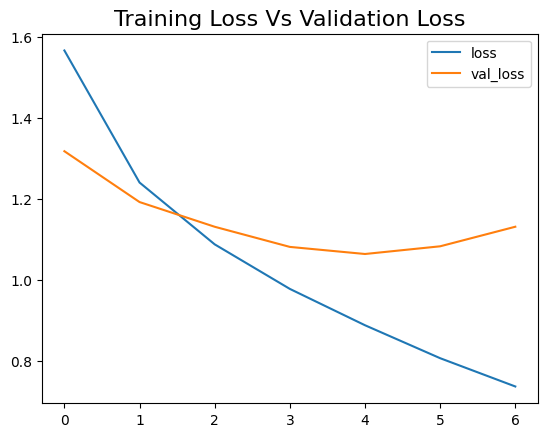

In [ ]:
# loss - i.e. training loss - how well the model is learning on the training data
metrics[['loss', 'val_loss']].plot() # plot() - function provided by Pandas; automatically puts selected columns on the y-axis and the training epochs on the x-axis
plt.title('Training Loss Vs Validation Loss', fontsize=16)
plt.show()

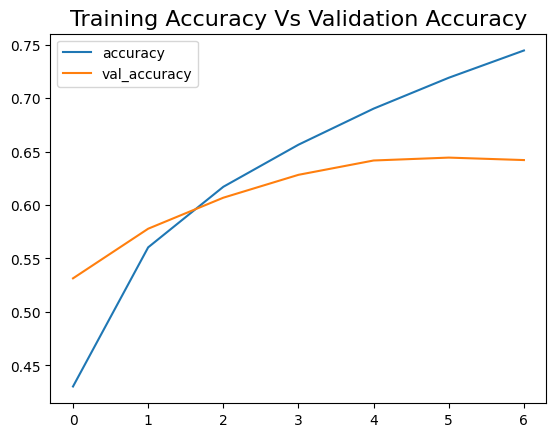

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Training Accuracy Vs Validation Accuracy', fontsize=16)
plt.show()

## Validating on Test Data

In [ ]:
model.evaluate(x_test,y_cat_test) # .evaluate - built-in Keras method - test data is input; assesses how well the model is doing

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0995 - loss: 4.9626


[4.961979389190674, 0.10000000149011612]

## Classification Report and Confusion Matrix

In [ ]:
# "- classification_report: This function generates a text report showing the main classification metrics like precision, recall, F1-score, and support for each class in a classification problem. It provides a comprehensive evaluation of the model's performance.
#  - confusion_matrix: This function creates a confusion matrix, which is a table that summarizes the performance of a classification model by showing the counts of true positive, true negative, false positive, and false negative predictions. It helps visualize where the model is making mistakes." (Gemini, 2024)

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#predictions = model.predict_classes(x_test) # predict_classes method no longer supported
predictions = np.argmax(model.predict(x_test), axis=-1)

# model.predict(x_test), axis=-1 - predicts the probabilities of each image belonging to each class (of the 10)
# np.argmax - for each image, selects the class w/highest probability as the predicted class label >> stored in the predictions var.

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [ ]:
print(classification_report(y_test,predictions))
# precision - out of all samples predicted as a specific class - # of correct?
# recall - out of all samples that actually belong to a specific class - how many correctly predicted?
# f1 score - harmonic mean of precision & recall - balanced measure of performance
# support - number of actual samples in each class

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.10      1.00      0.18      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
confusion_matrix(y_test,predictions)

array([[   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1000,    0,    0,    0,    0,    0,    0]])

# Predicting on single image

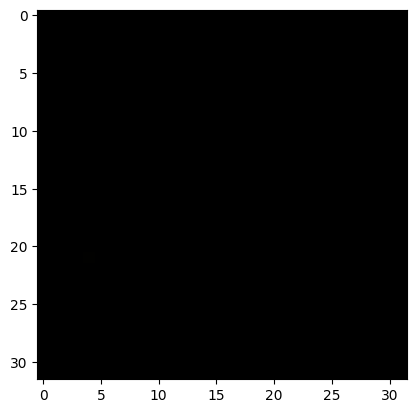

In [ ]:
plt.imshow(x_test[16]) # imshow - function within matplotlib.pyplot designed to display images

In [ ]:
my_image = x_test[16]

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
#model.predict_classes(my_image.reshape(1,32,32,3)) - predict_classes depreciated
np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=-1) # takes the reshaped image data as input and predicts the class label for image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([3])

In [ ]:
LABEL_NAMES[y_test[16][0]]

'dog'